## Economic Data Analysis using FRED and Pandas

In [10]:
##import the needed tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred 

#Set default plotting style
plt.style.use('fivethirtyeight')
#Change color palatte here | this will pull the default colors from whatever theme you are using in matplotlib
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

#For demonstration purpose I will put this open source API key here, generally speaking this would be ignored
fred_key = "4e281a872f4449a663024303ec80198f"

### 1. Create the FRED object

In [11]:
#The Fred object is the object that will be doing most of the pulling down and accessing data
fred = Fred(api_key=fred_key)

### 2. Search for economic data

In [14]:
#It's import to note that with the fred object. When you call the search method, it's similar to searching with a search bar\
#It will return the data as a dataframe
#When you pull the data it's most like clicking and downloading a CSV
sp_search = fred.search('S&P', order_by = 'popularity')
#This will provide a data frame that contains the search value results | sorted by popularity


### 3. Pull raw data & plot

<AxesSubplot:title={'center':'S&P 500'}>

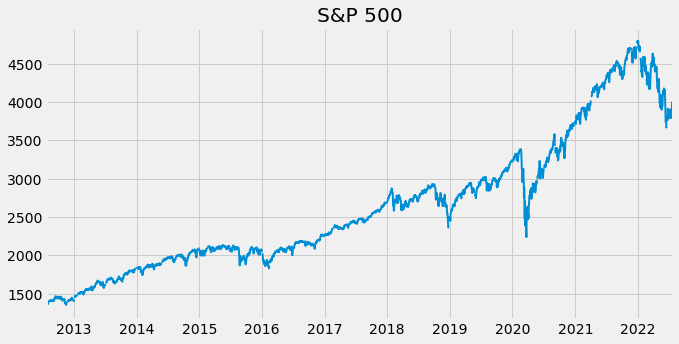

In [18]:
sp500 = fred.get_series(series_id = "SP500")

sp500.plot(figsize=(10, 5), title='S&P 500',lw=2)

### 4. Pull and Join Multiple data Series

<AxesSubplot:title={'center':'Seasonally adjusted unemployment rate'}>

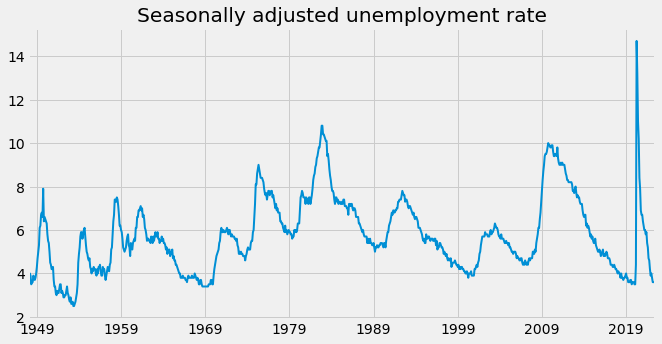

In [23]:
uemp_results = fred.search('unemployment')

unrate =  fred.get_series('UNRATE')

unrate.plot(figsize=(10,5), title='Seasonally adjusted unemployment rate', lw=2)



In [37]:
#check for more specific unemployment data
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

#Filtering the unemp_df set some
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

#Further filtering to find the rate in the title

unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]


In [52]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unemp_results = pd.concat(all_results, axis=1)

In [57]:
#I need to pull data that cooresponds to states only
#After checking the data UR is in each column that represents each state. 
unemp_results_cols = [col for col in unemp_results.columns if 'UR' not in col]
print(unemp_results_cols)
unemp_results.drop(['UNRATE', 'LNS14000006', 'LNS14000031', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'LNS14000024', 'LNS14000002', 'U2RATE', 'LNS14000009', 'LNS14000003', 'LNS14000001', 'LNS14027662', 'LRUN64TTUSM156S', 'LNS14032183', 'LNS14000012', 'LNS14027660', 'LASMT261982000000003', 'LASMT391746000000003', 'LNS14000018', 'LNS14000060', 'LNS14024887', 'LNS14027659', 'LNS14000036', 'LNS14000032', 'LRUN24TTUSM156S', 'LNS14027689', 'LNS14000028', 'LRHUTTTTUSM156S', 'LNS14024230', 'LRUNTTTTUSM156S', 'LNS14000029', 'LNS14000026', 'LNS14000150', 'LNS14000048', 'LNS14000315', 'LNS14000025', 'LNS14000089', 'LNS14200000'], axis=1)

['UNRATE', 'LNS14000006', 'LNS14000031', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'LNS14000024', 'LNS14000002', 'U2RATE', 'LNS14000009', 'LNS14000003', 'LNS14000001', 'LNS14027662', 'LRUN64TTUSM156S', 'LNS14032183', 'LNS14000012', 'LNS14027660', 'LASMT261982000000003', 'LASMT391746000000003', 'LNS14000018', 'LNS14000060', 'LNS14024887', 'LNS14027659', 'LNS14000036', 'LNS14000032', 'LRUN24TTUSM156S', 'LNS14027689', 'LNS14000028', 'LRHUTTTTUSM156S', 'LNS14024230', 'LRUNTTTTUSM156S', 'LNS14000029', 'LNS14000026', 'LNS14000150', 'LNS14000048', 'LNS14000315', 'LNS14000025', 'LNS14000089', 'LNS14200000']


,CAUR,FLUR,TXUR,NYUR,OHUR,MIUR,MAUR,MNUR,TNUR,PAUR,...,IDUR,NHUR,RIUR,MEUR,CMWRUR,VTUR,CSOUUR,CWSTUR,CNEWUR,USAURAMS
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,5.3,3.3,4.7,4.9,4.2,4.7,4.7,2.7,3.4,5.1,...,2.8,2.7,3.9,4.0,3.7,2.9,3.8,4.6,4.3,NaN
2022-03-01,4.8,3.2,4.4,4.6,4.1,4.4,4.3,2.5,3.2,4.9,...,2.7,2.4,3.4,3.6,3.5,2.6,3.7,4.3,4.0,NaN
2022-04-01,4.6,3.0,4.3,4.5,4.0,4.3,4.1,2.2,3.2,4.8,...,2.6,2.3,3.2,3.3,3.5,2.5,3.6,4.1,3.8,NaN
2022-05-01,4.3,3.0,4.2,4.4,3.9,4.3,3.9,2.0,3.3,4.6,...,2.5,2.1,2.9,3.2,3.4,2.3,3.5,4.0,3.6,NaN
